In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np


In [92]:
data=pd.read_csv("D:/Seema-class-excelr/CSV/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [85]:
#Just to get information of classes of dtate
data.groupby('State',as_index=False).count()

,State,R&D Spend,Administration,Marketing Spend,Profit
0,California,17,17,17,17
1,Florida,16,16,16,16
2,New York,17,17,17,17


In [93]:
! pip install scikit-learn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['State'] = data['State'].astype('category')
#le = LabelEncoder()
data['State2'] = le.fit_transform(data['State'])


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
conda 4.10.3 requires ruamel_yaml_conda>=0.11.14, which is not installed.
You are using pip version 10.0.1, however version 22.0.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [94]:
data.head(5)
#data.groupby("State").

,R&D Spend,Administration,Marketing Spend,State,Profit,State2
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null category
Profit             50 non-null float64
State2             50 non-null int64
dtypes: category(1), float64(4), int64(1)
memory usage: 2.2 KB


In [100]:
data1 = data
data1

,R&D Spend,Administration,Marketing Spend,Profit,State2
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1
5,131876.90,99814.71,362861.36,156991.12,2
6,134615.46,147198.87,127716.82,156122.51,0
7,130298.13,145530.06,323876.68,155752.60,1
8,120542.52,148718.95,311613.29,152211.77,2
9,123334.88,108679.17,304981.62,149759.96,0


In [101]:
del data1['State']

KeyError: 'State'

In [102]:
data1

,R&D Spend,Administration,Marketing Spend,Profit,State2
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1
5,131876.90,99814.71,362861.36,156991.12,2
6,134615.46,147198.87,127716.82,156122.51,0
7,130298.13,145530.06,323876.68,155752.60,1
8,120542.52,148718.95,311613.29,152211.77,2
9,123334.88,108679.17,304981.62,149759.96,0


In [97]:
data1.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
State2             0
dtype: int64

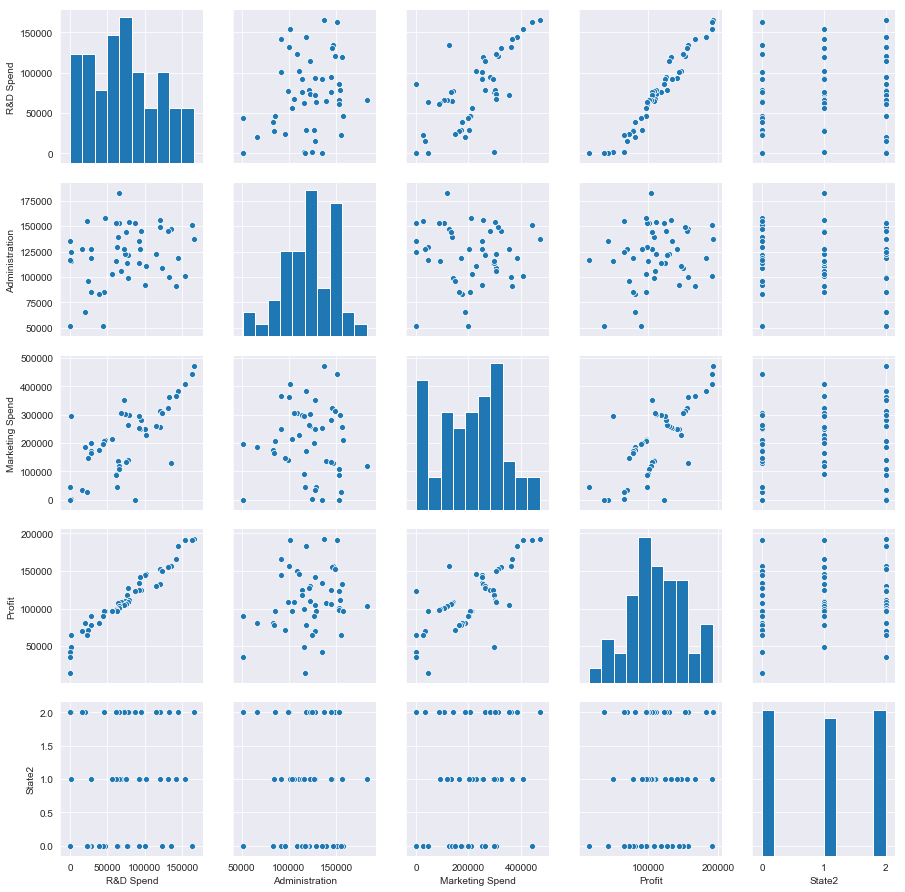

In [98]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

In [106]:
data1.rename(columns= {'R&D Spend' : 'RD',
                      'Administration': 'AD',
                      'Marketing Spend':'MD',
                      'State2':'S2'}, inplace=True)

In [110]:
data1.columns

Index(['RD', 'AD', 'MD', 'Profit', 'S2'], dtype='object')

In [112]:
import statsmodels.formula.api as smf
model=smf.ols('Profit~RD+AD+MD+S2',data=data1).fit()


In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           8.51e-29
Time:                        20:15:31   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RD             0.8058      0.046     17.609      0.000       0.714       0.898
AD            -0.0268      0.052     -0.520      0.606      -0.131       0.077
MD             0.0272      0.017      1.637      0.109      -0.006       0.061
S2           -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
import statsmodels.formula.api as smf
ml_ad=smf.ols('Profit~AD',data=data1).fit()

In [116]:
ml_ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 09 Mar 2022   Prob (F-statistic):              0.162
Time:                        20:24:08   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
AD             0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
import statsmodels.formula.api as smf
ml_profit=smf.ols('Profit~RD+MD',data=data1).fit()


In [119]:
ml_profit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           2.16e-31
Time:                        20:25:57   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD             0.7966      0.041     19.266      0.000       0.713       0.880
MD             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
rsq_rd=smf.ols('RD~Profit+MD',data=data1).fit().rsquared
vif_rd=1/(1-rsq_rd)
rsq_md=smf.ols('MD~Profit+RD',data=data1).fit().rsquared
vif_md=1/(1-rsq_md)

In [123]:
d1={'Variables':['RD','MD'],
   'VIF':[vif_rd,vif_md]}
vif_Frame=pd.DataFrame(d1)
vif_Frame

,Variables,VIF
0,RD,18.712339
1,MD,2.269383


H:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


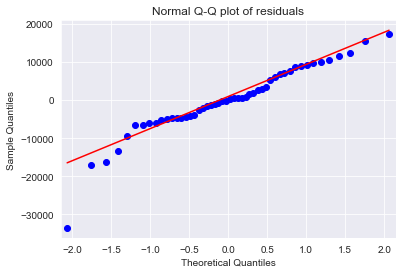

In [125]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [130]:
list(np.where(model.resid<-10000))

[array([14, 15, 48, 49], dtype=int64)]

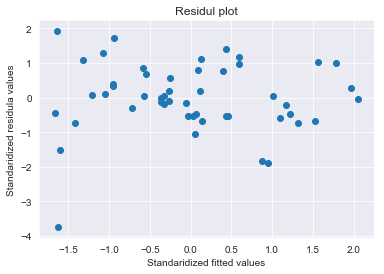

In [137]:
def get_standardized_values (vals):
    return(vals-vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residul plot')
plt.xlabel('Standaridized fitted values')
plt.ylabel('Standaridized residula values')
plt.show()

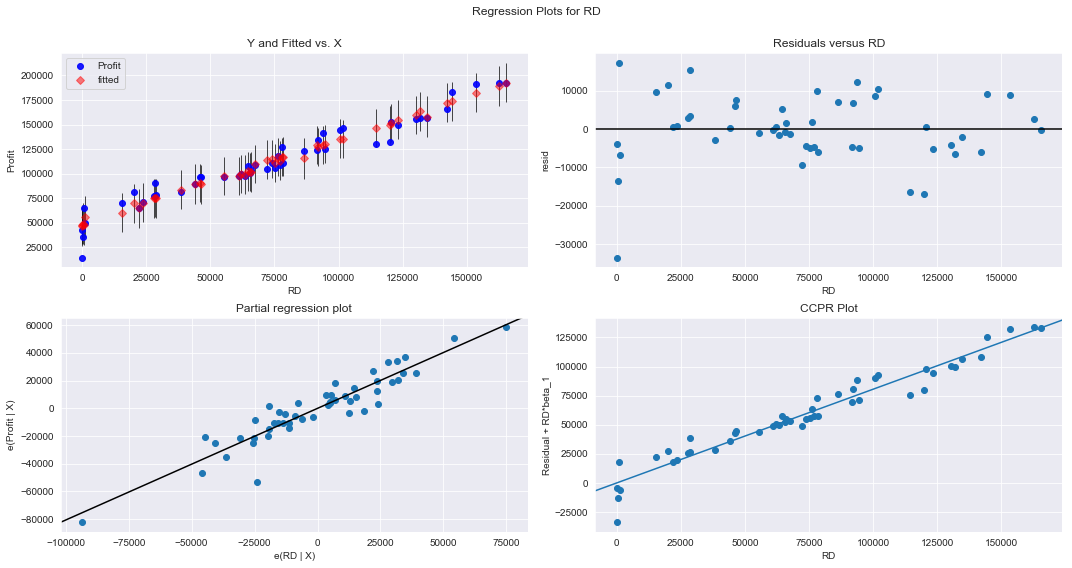

In [138]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"RD",fig=fig)
plt.show()

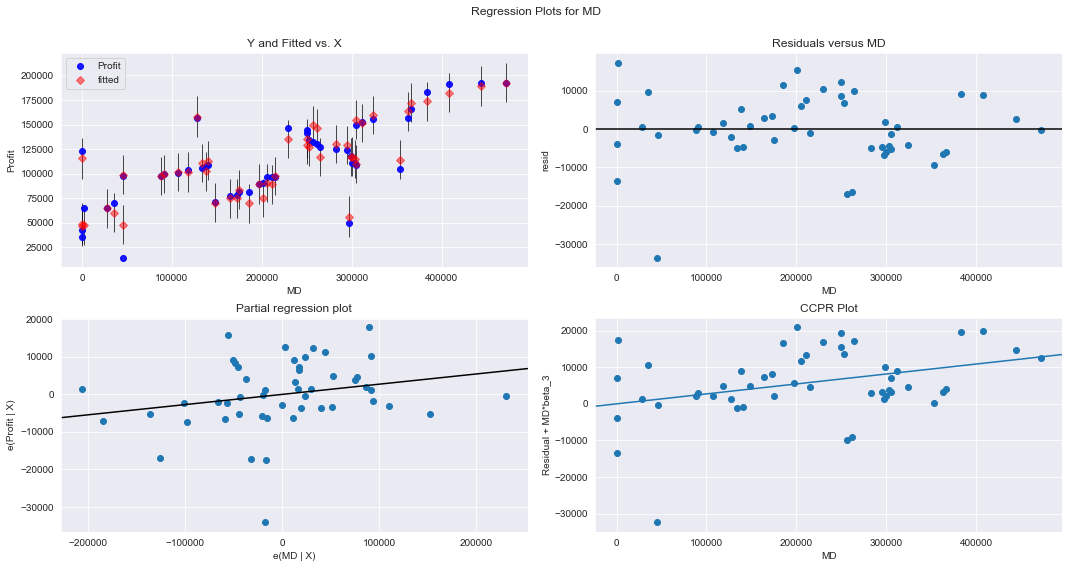

In [139]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"MD",fig=fig)
plt.show()

In [144]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

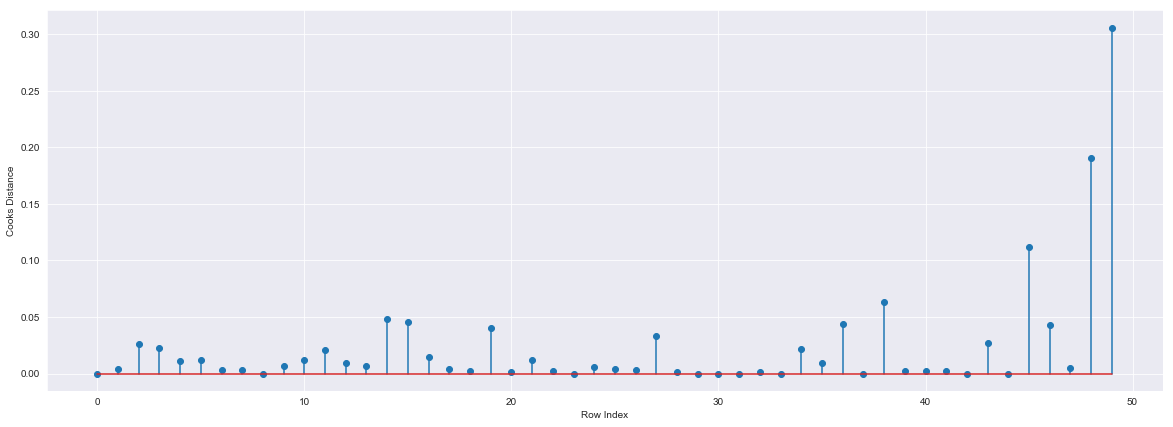

In [145]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [146]:
(np.argmax(c),np.max(c))

(49, 0.3060281954699341)

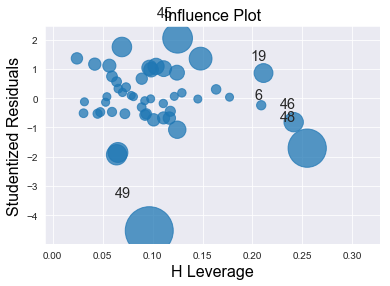

In [147]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [150]:
k=data1.shape[1]
n=data1.shape[0]
leverage_Cutoff=3*((k+1)/n)

In [153]:
data1[data1.index.isin([49,48])]

,RD,AD,MD,Profit,S2
48,542.05,51743.15,0.00,35673.41,2
49,0.00,116983.80,45173.06,14681.40,0


In [159]:
data2=data1.drop(data1.index[[48,49]],axis=0).reset_index()

In [173]:
data2

,index,RD,AD,MD,Profit,S2
0,0,165349.20,136897.80,471784.10,192261.83,2
1,1,162597.70,151377.59,443898.53,191792.06,0
2,2,153441.51,101145.55,407934.54,191050.39,1
3,3,144372.41,118671.85,383199.62,182901.99,2
4,4,142107.34,91391.77,366168.42,166187.94,1
5,5,131876.90,99814.71,362861.36,156991.12,2
6,6,134615.46,147198.87,127716.82,156122.51,0
7,7,130298.13,145530.06,323876.68,155752.60,1
8,8,120542.52,148718.95,311613.29,152211.77,2
9,9,123334.88,108679.17,304981.62,149759.96,0


In [161]:
final_RD_MD=smf.ols('Profit~RD+MD',data=data2).fit()
(final_RD_MD.rsquared,final_RD_MD.aic)

(0.9609119875752478, 994.8864429429412)

In [162]:
model_influence_Profit=final_RD_MD.get_influence()
(c_Profit,_)=model_influence_Profit.cooks_distance

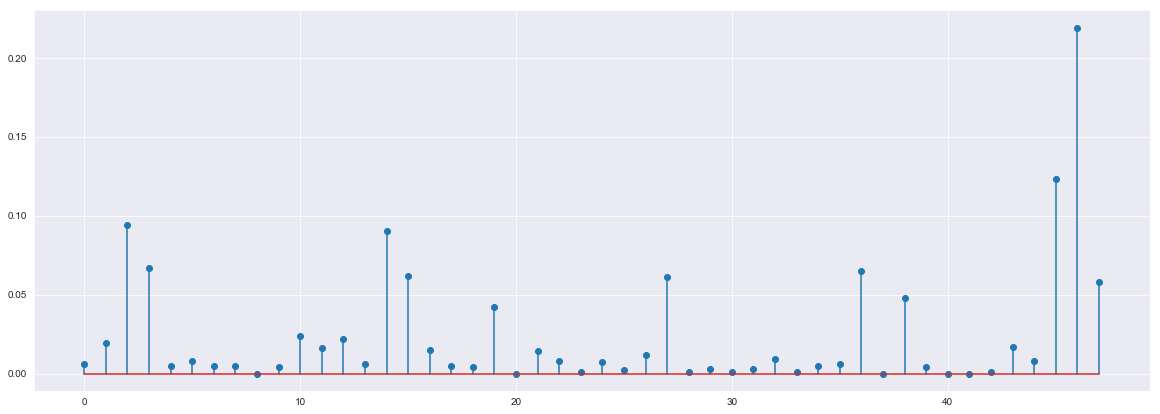

In [163]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),
         np.round(c_Profit,3));

In [164]:
(np.argmax(c_Profit),np.max(c_Profit))

(46, 0.21870175123751653)

In [174]:
data3=data2.drop(data2.index[[46]],axis=0)

In [175]:
data3

,index,RD,AD,MD,Profit,S2
0,0,165349.20,136897.80,471784.10,192261.83,2
1,1,162597.70,151377.59,443898.53,191792.06,0
2,2,153441.51,101145.55,407934.54,191050.39,1
3,3,144372.41,118671.85,383199.62,182901.99,2
4,4,142107.34,91391.77,366168.42,166187.94,1
5,5,131876.90,99814.71,362861.36,156991.12,2
6,6,134615.46,147198.87,127716.82,156122.51,0
7,7,130298.13,145530.06,323876.68,155752.60,1
8,8,120542.52,148718.95,311613.29,152211.77,2
9,9,123334.88,108679.17,304981.62,149759.96,0


In [176]:
data4=data3.drop(['index'],axis=1)

In [177]:
data4

,RD,AD,MD,Profit,S2
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1
5,131876.90,99814.71,362861.36,156991.12,2
6,134615.46,147198.87,127716.82,156122.51,0
7,130298.13,145530.06,323876.68,155752.60,1
8,120542.52,148718.95,311613.29,152211.77,2
9,123334.88,108679.17,304981.62,149759.96,0


In [178]:
final_Profit=smf.ols('Profit~RD+MD',data=data4).fit()

In [179]:
model_influence_Profit=final_Profit.get_influence()
(c_Profit,_)=model_influence_Profit.cooks_distance

Text(0,0.5,'Cooks distance')

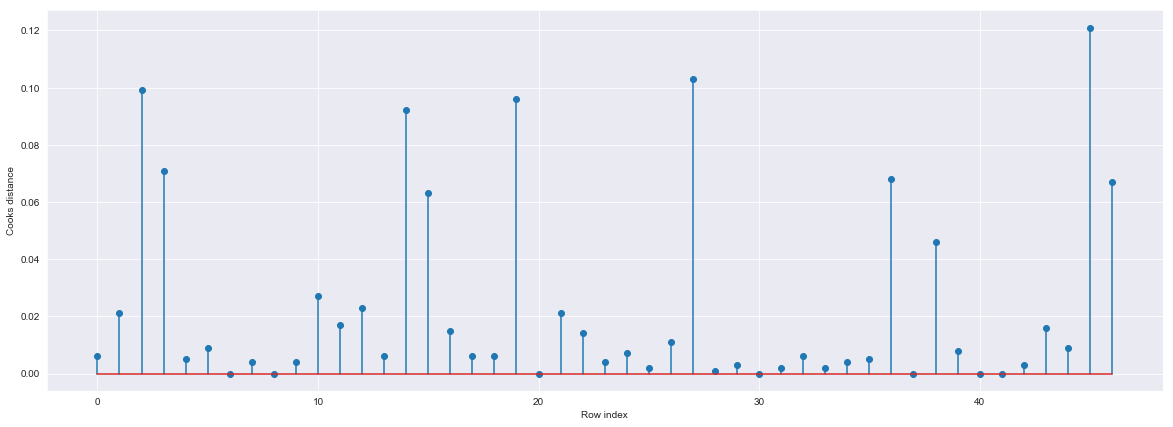

In [183]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data4)),
        np.round(c_Profit,3));
plt.xlabel('Row index')
plt.ylabel('Cooks distance')

In [188]:
(np.argmax(c_Profit),np.max(c_Profit))

(45, 0.12080904032648031)

In [190]:

data5=data4.drop(data4.index[[45]],axis=0)

In [191]:
data5

,RD,AD,MD,Profit,S2
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1
5,131876.90,99814.71,362861.36,156991.12,2
6,134615.46,147198.87,127716.82,156122.51,0
7,130298.13,145530.06,323876.68,155752.60,1
8,120542.52,148718.95,311613.29,152211.77,2
9,123334.88,108679.17,304981.62,149759.96,0


Text(0,0.5,'Cooks distance')

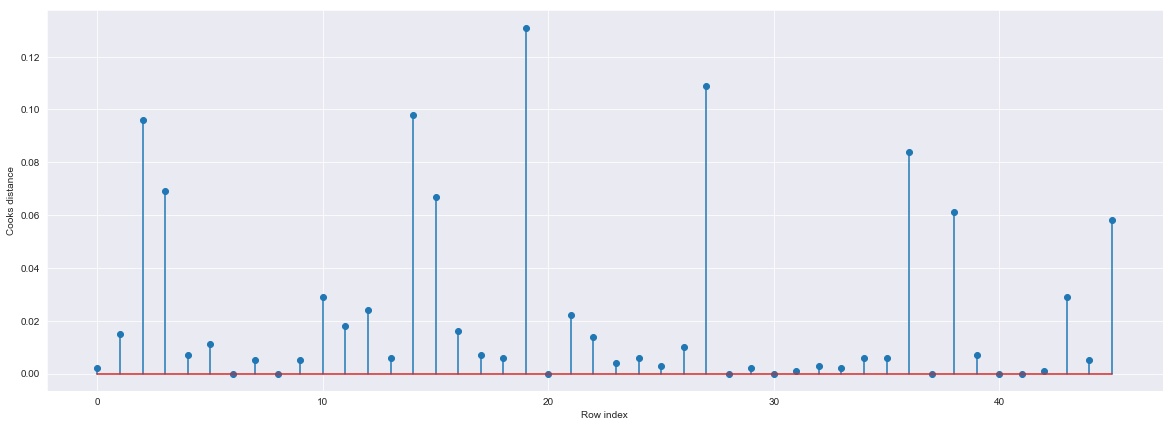

In [193]:
final_Profit=smf.ols('Profit~RD+MD',data=data5).fit()

model_influence_Profit=final_Profit.get_influence()
(c_Profit,_)=model_influence_Profit.cooks_distance

fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data5)),
        np.round(c_Profit,3));
plt.xlabel('Row index')
plt.ylabel('Cooks distance')

In [194]:
(np.argmax(c_Profit),np.max(c_Profit))

(19, 0.13115264468345503)

In [223]:
model_influence_Profit.cooks_distance

(array([2.06448569e-03, 1.51244840e-02, 9.61274179e-02, 6.93990192e-02,
        7.03676080e-03, 1.11934718e-02, 1.86908872e-04, 5.31134464e-03,
        8.09623022e-05, 4.67820142e-03, 2.87890097e-02, 1.78093264e-02,
        2.41892213e-02, 6.06956002e-03, 9.81138119e-02, 6.73347111e-02,
        1.60744574e-02, 6.66734614e-03, 6.12522934e-03, 1.31152645e-01,
        7.77640443e-05, 2.22250195e-02, 1.43352527e-02, 4.10975640e-03,
        6.00621101e-03, 3.39153296e-03, 1.04655707e-02, 1.09411529e-01,
        1.70256586e-04, 1.90667229e-03, 3.12814606e-06, 1.38575452e-03,
        3.33474436e-03, 1.79559214e-03, 5.90605728e-03, 6.45884109e-03,
        8.43311595e-02, 3.46410304e-05, 6.11937773e-02, 6.54593456e-03,
        4.67640750e-05, 3.08459985e-04, 1.48712681e-03, 2.89661401e-02,
        4.96494974e-03, 5.77393607e-02]),
 array([0.99986838, 0.99742268, 0.9617628 , 0.97594495, 0.99917571,
        0.99835285, 0.99999641, 0.99945856, 0.99999898, 0.99955216,
        0.99331959, 0.99671527

In [240]:
data5['c_profit'] = c_Profit

In [241]:
data5[data5.c_profit < 0.05]

,RD,AD,MD,Profit,S2,c_profit
0,165349.20,136897.80,471784.10,192261.83,2,0.002064
1,162597.70,151377.59,443898.53,191792.06,0,0.015124
4,142107.34,91391.77,366168.42,166187.94,1,0.007037
5,131876.90,99814.71,362861.36,156991.12,2,0.011193
6,134615.46,147198.87,127716.82,156122.51,0,0.000187
7,130298.13,145530.06,323876.68,155752.60,1,0.005311
8,120542.52,148718.95,311613.29,152211.77,2,0.000081
9,123334.88,108679.17,304981.62,149759.96,0,0.004678
10,101913.08,110594.11,229160.95,146121.95,1,0.028789
11,100671.96,91790.61,249744.55,144259.40,0,0.017809


In [243]:
final_Profit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     532.5
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           4.59e-31
Time:                        13:44:01   Log-Likelihood:                -471.88
No. Observations:                  46   AIC:                             949.8
Df Residuals:                      43   BIC:                             955.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.029e+04   2424.629     20.743      0.000    4.54e+04    5.52e+04
RD             0.7507      0.037     20.511      0.000       0.677       0.825
MD             0.0350      0.013      2.627      0.012       0.008       0.062
==============================================================================
Omnibus:                        0.061   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.161
Skew:                          -0.079   Prob(JB):                        0.923
Kurtosis:                       2.758   Cond. No.                     6.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""